In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "distribuzioni_coniugate_1"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

In [3]:
# Dati osservati
y = np.array([26.0, 35.0, 30, 25, 44, 30, 33, 43, 22, 43, 24, 19, 39, 31, 25, 
              28, 35, 30, 26, 31, 41, 36, 26, 35, 33, 28, 27, 34, 27, 22])
y_bar = np.mean(y)
sigma = np.std(y, ddof=1)  # Uso ddof=1 per la deviazione standard campionaria
n = len(y)

In [4]:
# Distribuzione a priori
mu_0 = 29
sigma_0 = 5

In [5]:
# Calcolo della media e deviazione standard a posteriori
mu_post = (mu_0 / sigma_0**2 + n * y_bar / sigma**2) / (1 / sigma_0**2 + n / sigma**2)
sigma_post = np.sqrt(1 / (1 / sigma_0**2 + n / sigma**2))

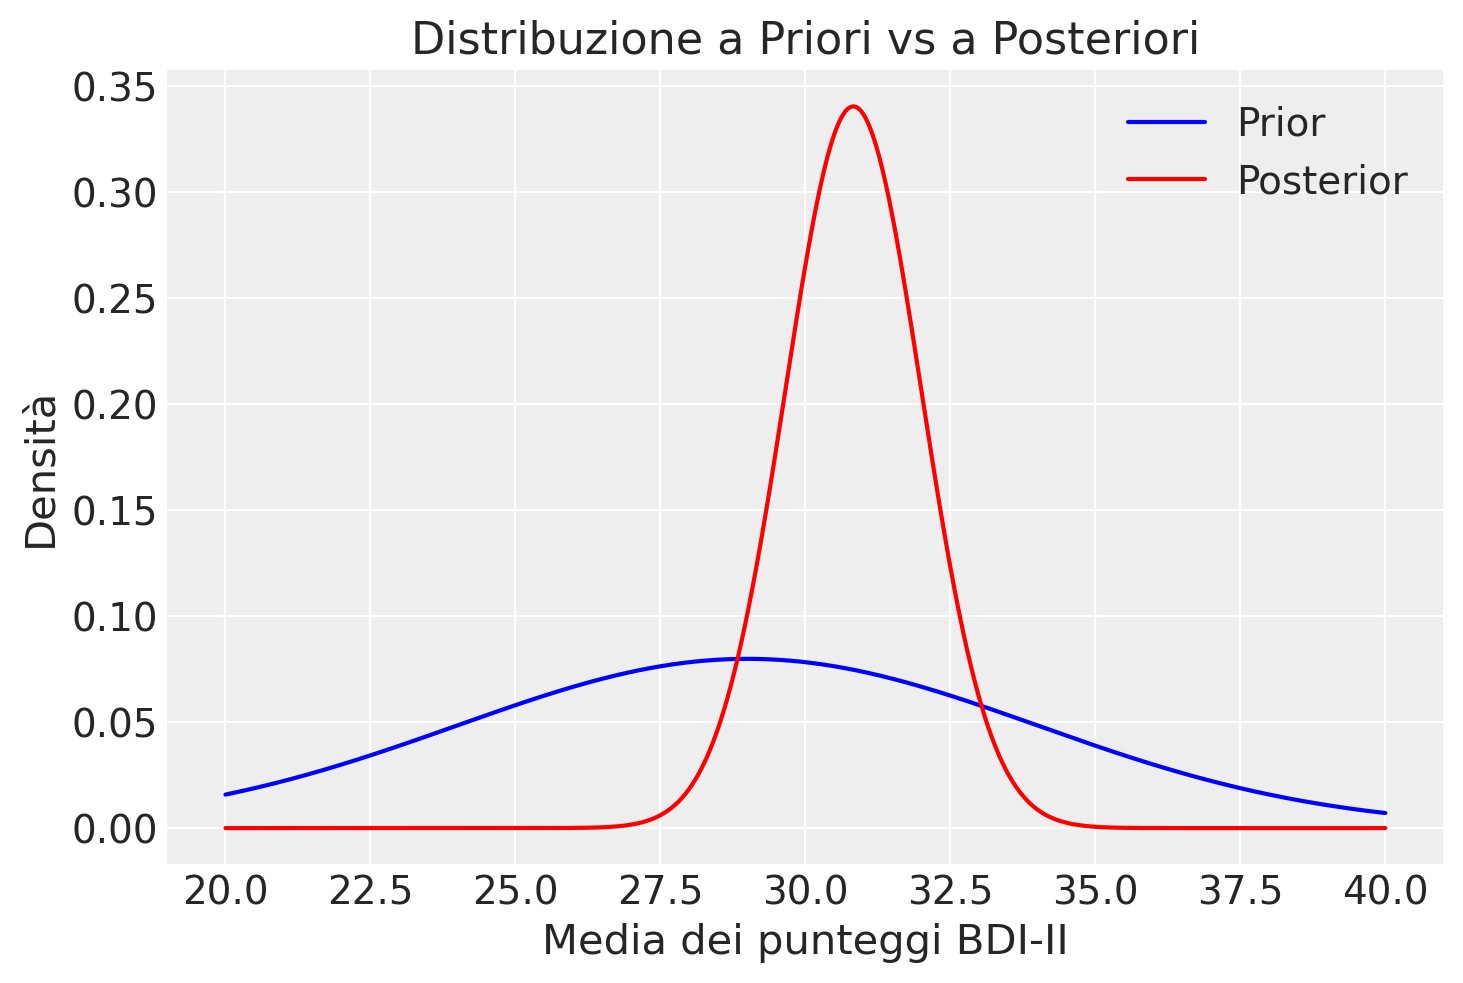

In [6]:
# Visualizzazione
x_axis = np.linspace(20, 40, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis, mu_0, sigma_0), label='Prior', color='blue')
plt.plot(x_axis, stats.norm.pdf(x_axis, mu_post, sigma_post), label='Posterior', color='red')
plt.xlabel('Media dei punteggi BDI-II')
plt.ylabel('Densità')
plt.title('Distribuzione a Priori vs a Posteriori')
_ = plt.legend()

In [7]:
print(f"Media a priori: {mu_0}, Deviazione standard a priori: {sigma_0}")
print(f"Media a posteriori: {mu_post:.2f}, Deviazione standard a posteriori: {sigma_post:.2f}")

Media a priori: 29, Deviazione standard a priori: 5
Media a posteriori: 30.83, Deviazione standard a posteriori: 1.17


In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.8.4
arviz     : 0.18.0
scipy     : 1.13.1
numpy     : 1.26.4

Watermark: 2.4.3

